# 🏅 Part 5: Matplotlib Professional Styling and Export

**Goal:** Master advanced aesthetic control by exploring styles, custom color palettes, and typography, culminating in the creation and high-quality export of a comprehensive, publication-ready report.

---
### Key Learning Objectives
1.  **Explore built-in `plt.style.use()` themes** (e.g., `'ggplot'`, `'seaborn'`).
2.  **Apply custom color palettes**, colormaps, and manual aesthetic settings.
3.  **Implement professional typography** using `plt.rcParams.update`.
4.  **Master high-quality export** settings (`dpi`, `bbox_inches='tight'`) for various formats (PNG, PDF, SVG).

🎯 Exploring matplotlib styles and themes...


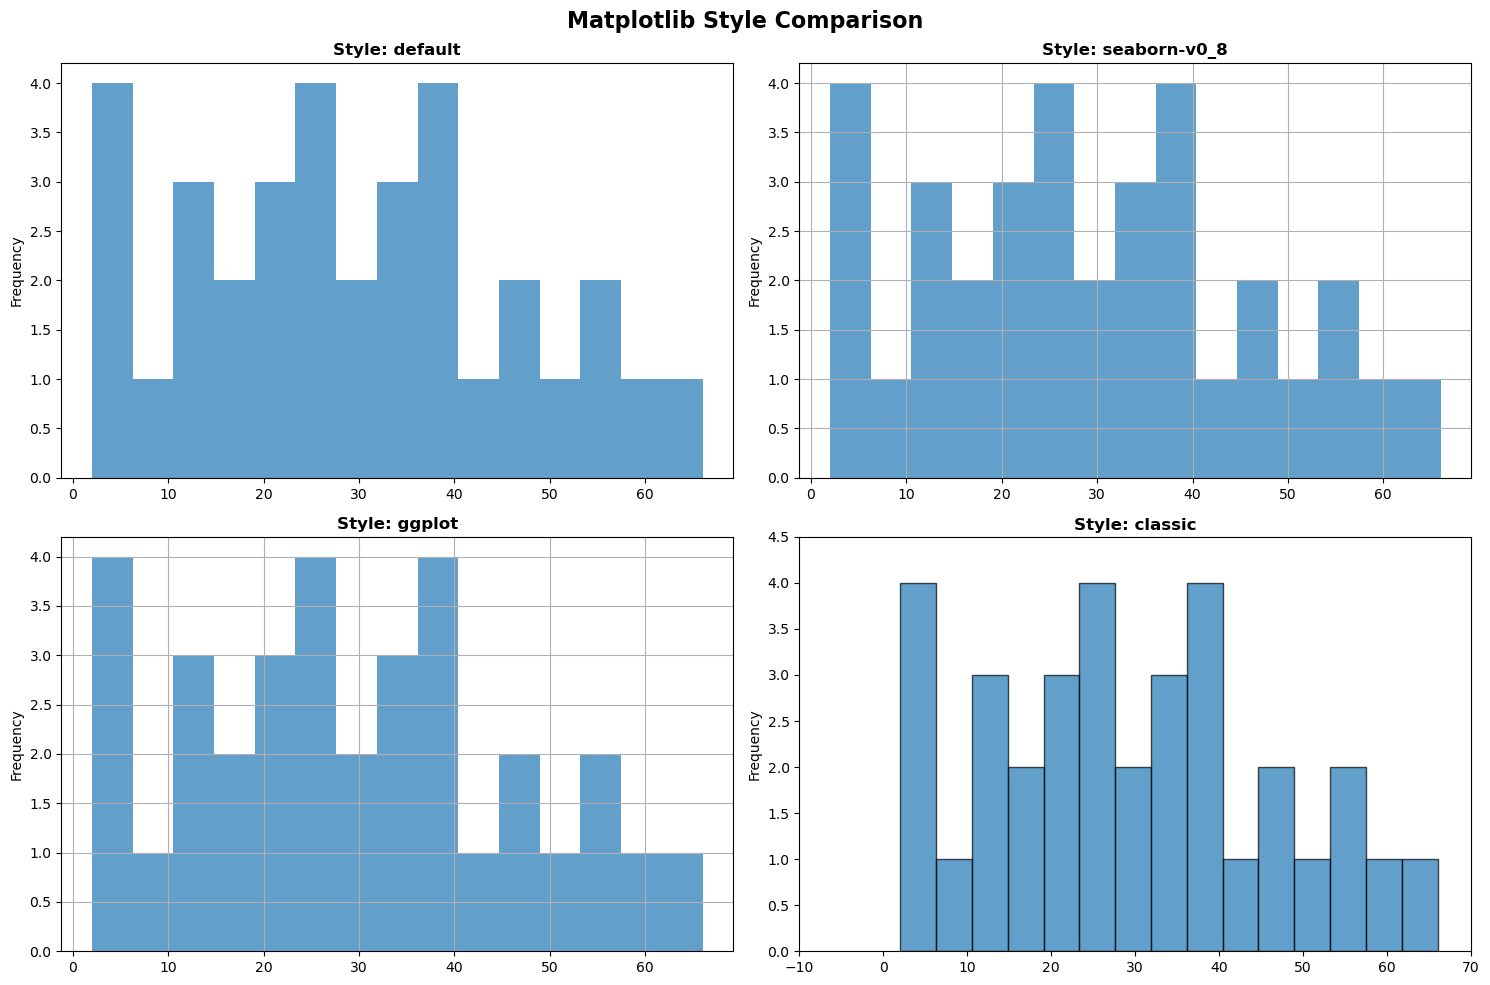

✅ Style application demo complete.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os # For file creation

# Sample Titanic data (reusing the local sample)
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2,
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33, 50, 47],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08,
             26.25, 7.75, 13.0, 9.0],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3, 1, 2],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
})


print("🎯 Exploring matplotlib styles and themes...")

# Compare different styles
styles_to_try = ['default', 'seaborn-v0_8', 'ggplot', 'classic']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Matplotlib Style Comparison', fontsize=16, fontweight='bold')

for i, style in enumerate(styles_to_try):
    row, col = i // 2, i % 2
    
    with plt.style.context(style):
        # Create age histogram with current style using pandas plot
        titanic_data['Age'].plot(kind='hist', bins=15, ax=axes[row, col], alpha=0.7)
        axes[row, col].set_title(f'Style: {style}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Set professional style for subsequent labs
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Style application demo complete.")

## 2. Color Palettes and Customization

We now apply custom color palettes, colormaps, and detailed aesthetic settings to move beyond the defaults and create visually sophisticated plots.

🎯 Mastering color palettes and advanced customization...


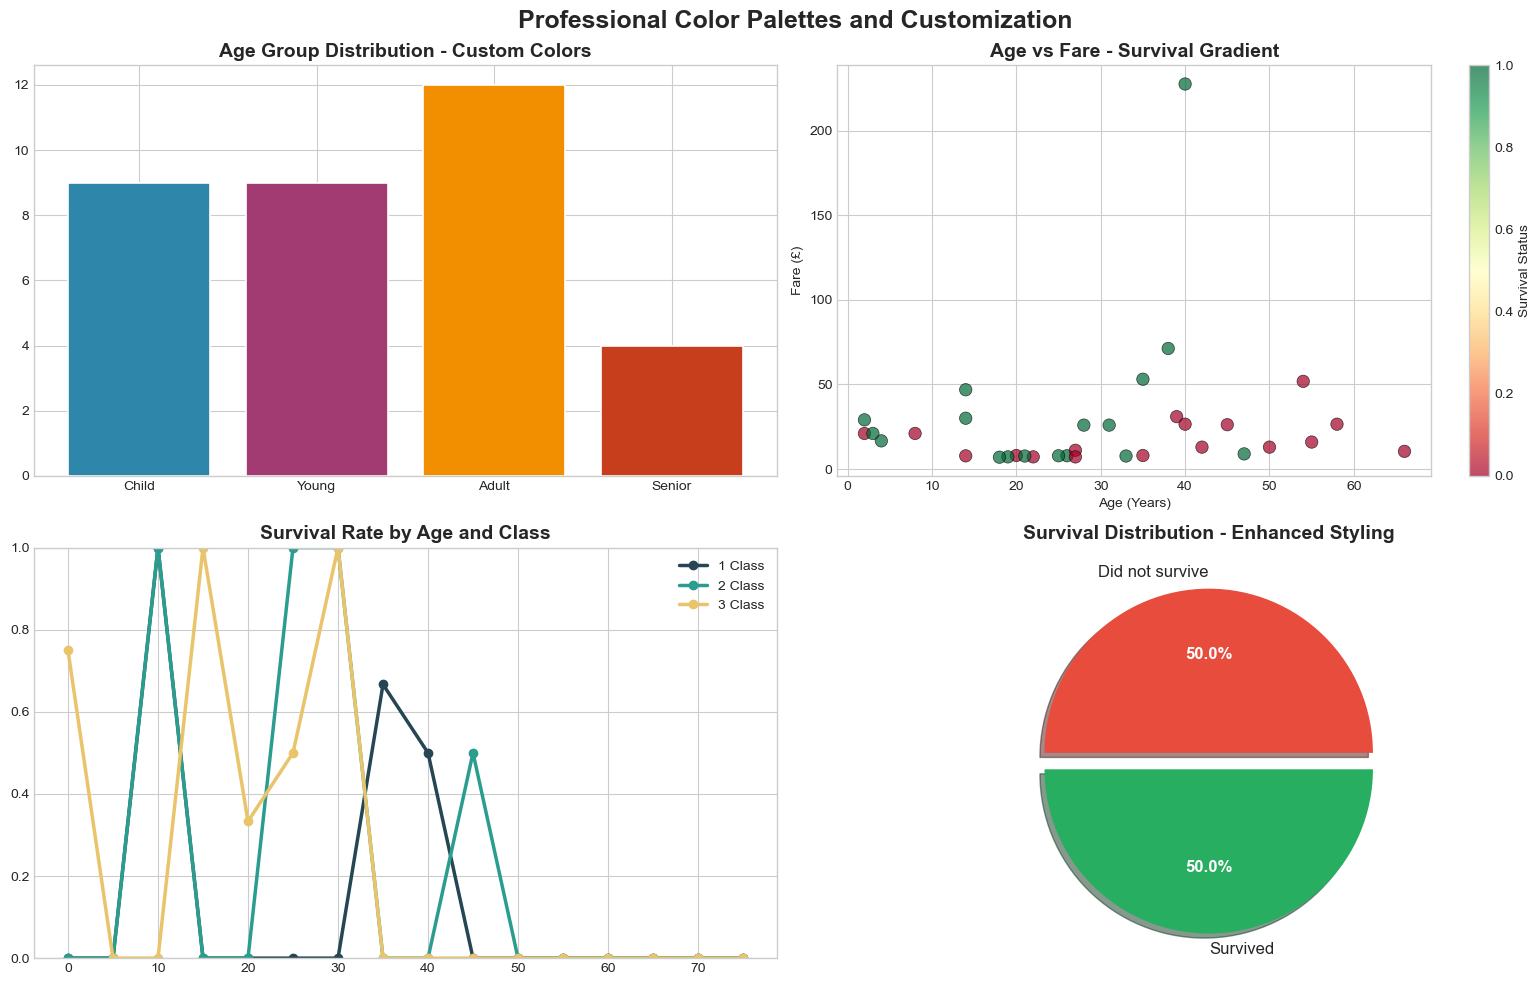

🎨 Professional color and stylistic techniques applied.


In [2]:
print("🎯 Mastering color palettes and advanced customization...")

# Define professional color palettes
colors_corporate = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
colors_academic = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Professional Color Palettes and Customization', fontsize=18, fontweight='bold')

# Plot 1: Professional histogram with custom colors
age_bins = [0, 18, 30, 50, 100]
age_groups = pd.cut(titanic_data['Age'], bins=age_bins, labels=['Child', 'Young', 'Adult', 'Senior'])
age_counts = age_groups.value_counts().sort_index()

bars = axes[0, 0].bar(age_counts.index, age_counts.values, color=colors_corporate[:len(age_counts)], 
                       edgecolor='white', linewidth=1.2)
axes[0, 0].set_title('Age Group Distribution - Custom Colors', fontsize=14, fontweight='bold')

# Plot 2: Gradient scatter plot
scatter = axes[0, 1].scatter(titanic_data['Age'], titanic_data['Fare'], 
                             c=titanic_data['Survived'], s=80, alpha=0.7,
                             cmap='RdYlGn', edgecolors='black', linewidth=0.5)
axes[0, 1].set_title('Age vs Fare - Survival Gradient', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Age (Years)')
axes[0, 1].set_ylabel('Fare (£)')
cbar = plt.colorbar(scatter, ax=axes[0, 1])
cbar.set_label('Survival Status')

# Plot 3: Multi-series line plot with custom academic styling
ages_range = list(range(0, 80, 5))
for pclass in [1, 2, 3]:
    survival_rates = []
    for age in ages_range:
        subset = titanic_data[(titanic_data['Age'] >= age) & (titanic_data['Age'] < age + 5) & (titanic_data['Pclass'] == pclass)]
        survival_rates.append(subset['Survived'].mean() if len(subset) > 0 else 0)
    
    axes[1, 0].plot(ages_range, survival_rates, marker='o', linewidth=2.5, 
                    markersize=6, label=f'{pclass} Class', color=colors_academic[pclass-1])

axes[1, 0].set_title('Survival Rate by Age and Class', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend(fontsize=10, framealpha=0.9)


# Plot 4: Enhanced pie chart with professional styling
survival_counts = titanic_data['Survived'].value_counts().sort_index()
wedges, texts, autotexts = axes[1, 1].pie(survival_counts.values,
                                         labels=['Did not survive', 'Survived'],
                                         colors=['#E74C3C', '#27AE60'],
                                         autopct='%1.1f%%',
                                         explode=(0, 0.1), # Highlight 'Survived' slice
                                         shadow=True,
                                         textprops={'fontsize': 12})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

axes[1, 1].set_title('Survival Distribution - Enhanced Styling', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

print("🎨 Professional color and stylistic techniques applied.")

## 3. Professional Typography and Text Formatting

We refine the visual presentation further by implementing custom font settings (`plt.rcParams`), and adding statistical annotations and text boxes to clearly convey analytical insights.

🎯 Mastering professional typography and text formatting...


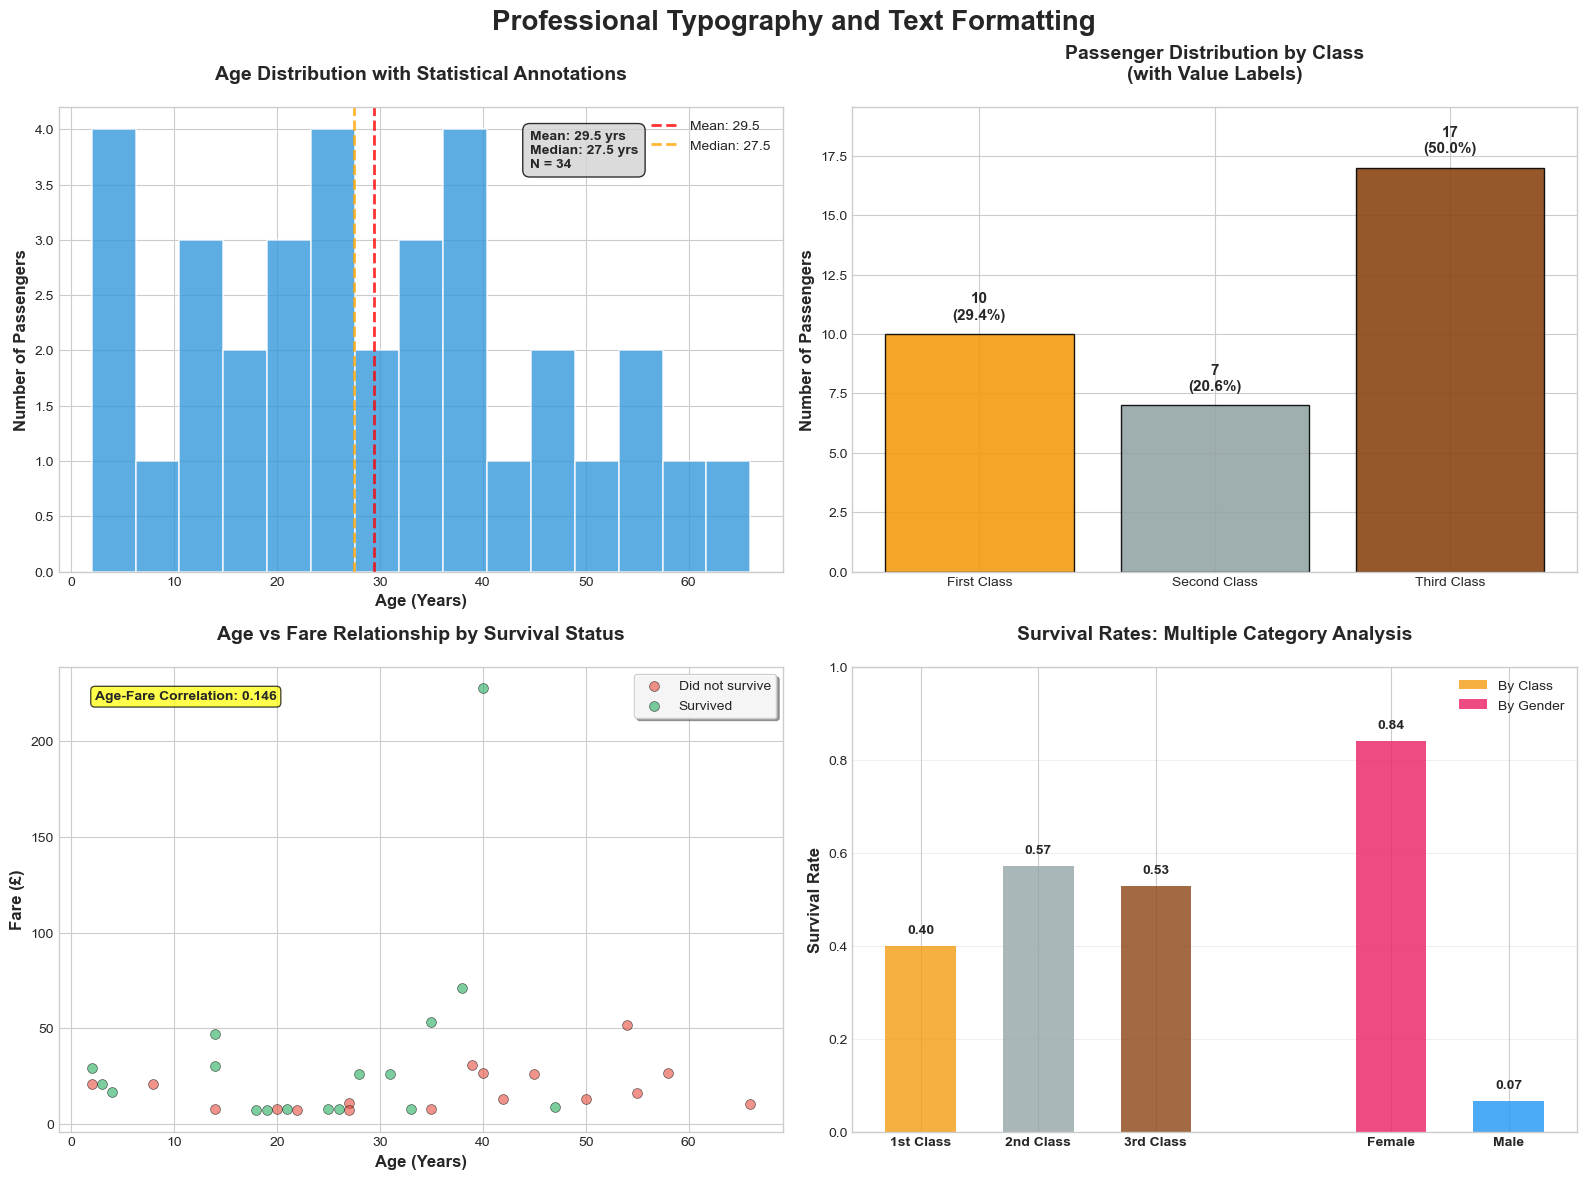

In [8]:
print("🎯 Mastering professional typography and text formatting...")

# --- DATA REFRESH ---
# Re-define or reload the data here to ensure 'Sex' column exists
# Sample Titanic data (including 'Sex' column)
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2,
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33, 50, 47],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08,
             26.25, 7.75, 13.0, 9.0],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', # Ensure 'Sex' is present
            'female', 'female', 'male', 'male', 'female', 'female', 'male', 'female',
            'male', 'female', 'female', 'female', 'female', 'male', 'female', 'male',
            'female', 'female', 'female', 'male', 'male', 'female', 'male', 'female',
            'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3, 1, 2],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
})
# --- END DATA REFRESH ---


# Custom font settings (re-applied for clean state)
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Professional Typography and Text Formatting',
             fontsize=20, fontweight='bold', y=0.98)

# Plot 1: Enhanced histogram with detailed annotations
axes[0, 0].hist(titanic_data['Age'], bins=15, color='#3498DB',
                 edgecolor='white', alpha=0.8, linewidth=1.2)
axes[0, 0].set_title('Age Distribution with Statistical Annotations',
                     fontsize=14, fontweight='bold', pad=20)
axes[0, 0].set_xlabel('Age (Years)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Number of Passengers', fontsize=12, fontweight='bold')

# Add statistical annotations
mean_age = titanic_data['Age'].mean()
median_age = titanic_data['Age'].median() # Added median
axes[0, 0].axvline(mean_age, color='red', linestyle='--', linewidth=2, alpha=0.8, label=f'Mean: {mean_age:.1f}')
axes[0, 0].axvline(median_age, color='orange', linestyle='--', linewidth=2, alpha=0.8, label=f'Median: {median_age:.1f}')

# Professional text box with statistics
stats_text = f'Mean: {mean_age:.1f} yrs\nMedian: {median_age:.1f} yrs\nN = {len(titanic_data)}'
axes[0, 0].text(0.65, 0.95, stats_text, transform=axes[0, 0].transAxes, # Adjusted position slightly
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8),
                 fontsize=10, fontweight='bold', verticalalignment='top')
axes[0, 0].legend() # Show legend for mean/median lines


# Plot 2: Bar chart with value labels and formatting
class_counts = titanic_data['Pclass'].value_counts().sort_index()
bars = axes[0, 1].bar(['First Class', 'Second Class', 'Third Class'],
                     class_counts.values, color=['#F39C12', '#95A5A6', '#8B4513'],
                     edgecolor='black', linewidth=1, alpha=0.9)

axes[0, 1].set_title('Passenger Distribution by Class\n(with Value Labels)',
                     fontsize=14, fontweight='bold', pad=20)
axes[0, 1].set_ylabel('Number of Passengers', fontsize=12, fontweight='bold')

# Add value labels with professional formatting
for i, (bar, value) in enumerate(zip(bars, class_counts.values)):
    percentage = (value / len(titanic_data)) * 100
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{value}\n({percentage:.1f}%)', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')
axes[0, 1].set_ylim(0, max(class_counts.values) * 1.15)


# Plot 3: Scatter plot with professional legend and annotations
survivors = titanic_data[titanic_data['Survived'] == 1]
non_survivors = titanic_data[titanic_data['Survived'] == 0]

scatter1 = axes[1, 0].scatter(non_survivors['Age'], non_survivors['Fare'],
                             alpha=0.6, color='#E74C3C', s=50, label='Did not survive',
                             edgecolors='black', linewidth=0.5)
scatter2 = axes[1, 0].scatter(survivors['Age'], survivors['Fare'],
                             alpha=0.6, color='#27AE60', s=50, label='Survived',
                             edgecolors='black', linewidth=0.5)

axes[1, 0].set_title('Age vs Fare Relationship by Survival Status',
                     fontsize=14, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Age (Years)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Fare (£)', fontsize=12, fontweight='bold')

# Professional legend with custom styling
legend = axes[1, 0].legend(loc='upper right', frameon=True, fancybox=True,
                         shadow=True, ncol=1, fontsize=10)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Add correlation annotation
correlation = titanic_data['Age'].corr(titanic_data['Fare'])
axes[1, 0].text(0.05, 0.95, f'Age-Fare Correlation: {correlation:.3f}',
             transform=axes[1, 0].transAxes,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
             fontsize=10, fontweight='bold', verticalalignment='top')


# Plot 4: Multi-category comparison with FIXED professional formatting
# Ensure the 'Sex' column exists before grouping
if 'Sex' in titanic_data.columns:
    survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
    survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean() # This should now work

    x_pos_class = [0, 1, 2]
    x_pos_gender = [4, 5]

    bars1 = axes[1, 1].bar(x_pos_class, survival_by_class.values,
                         color=['#F39C12', '#95A5A6', '#8B4513'], alpha=0.8,
                         label='By Class', width=0.6)
    bars2 = axes[1, 1].bar(x_pos_gender, survival_by_gender.values,
                         color=['#E91E63', '#2196F3'], alpha=0.8,
                         label='By Gender', width=0.6)

    all_positions = x_pos_class + x_pos_gender
    all_labels = ['1st Class', '2nd Class', '3rd Class', 'Female', 'Male']

    axes[1, 1].set_xticks(all_positions)
    axes[1, 1].set_xticklabels(all_labels, fontsize=10, fontweight='bold')

    axes[1, 1].set_title('Survival Rates: Multiple Category Analysis',
                         fontsize=14, fontweight='bold', pad=20)
    axes[1, 1].set_ylabel('Survival Rate', fontsize=12, fontweight='bold')
    axes[1, 1].set_ylim(0, 1)

    # Add value labels on bars
    all_bars = list(bars1) + list(bars2)
    all_values = list(survival_by_class.values) + list(survival_by_gender.values)
    for bar, value in zip(all_bars, all_values):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                        f'{value:.2f}', ha='center', va='bottom',
                        fontsize=10, fontweight='bold')

    axes[1, 1].legend(loc='upper right', fontsize=10, framealpha=0.9)
    axes[1, 1].grid(axis='y', alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, "Error: 'Sex' column not found in data.", 
                    ha='center', va='center', fontsize=12, color='red')
    axes[1, 1].set_title('Error in Plot 4 Data', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

## 4. High-Quality Export

The final step is to save the visualization in publication-ready formats. **Vector formats (.pdf, .svg)** are preferred for print and scalability, while **high-DPI raster formats (.png)** are best for presentations.

We ensure the figure is saved *before* being displayed to guarantee the image file is not blank.

🎯 Mastering export formats and high-quality output...
✅ High-res PNG saved.
✅ Publication PDF saved (Vector).


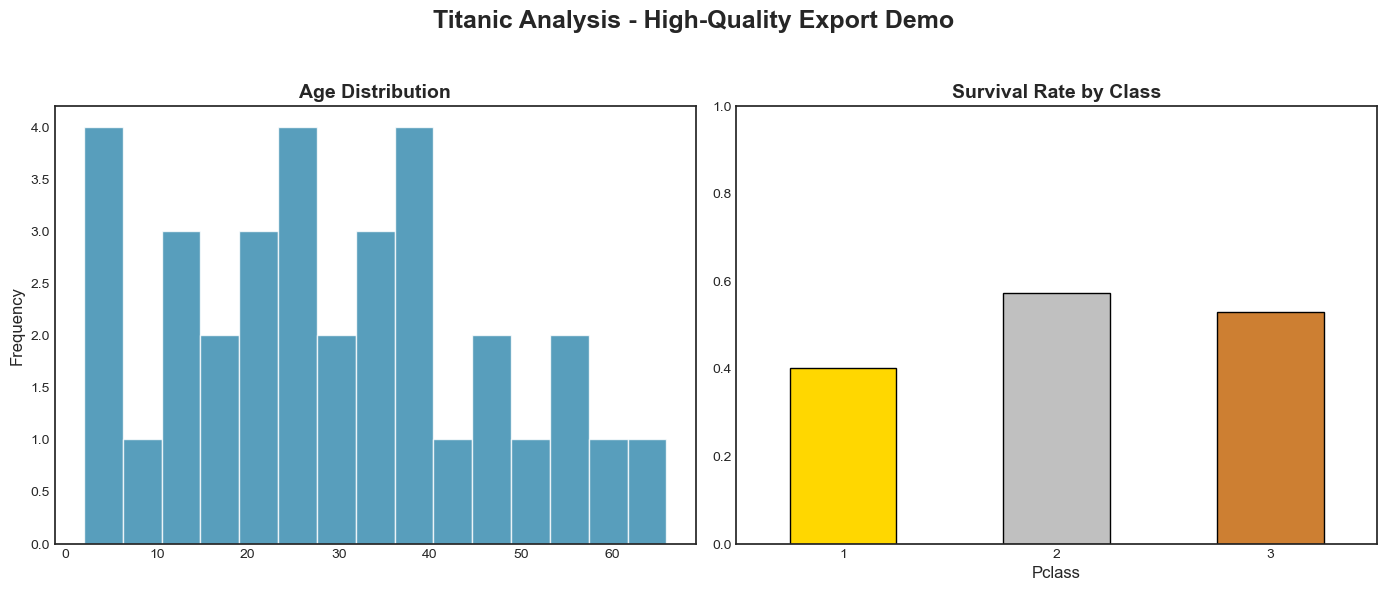


--- CONCLUSION ---
🎯 Part 5 complete! You've mastered professional matplotlib styling and export.


In [9]:
print("🎯 Mastering export formats and high-quality output...")

# Create a final visualization for export testing
plt.style.use('seaborn-v0_8-white')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Titanic Analysis - High-Quality Export Demo', 
             fontsize=18, fontweight='bold', y=0.98)

# Plot 1: Age distribution
titanic_data['Age'].plot(kind='hist', bins=15, ax=axes[0], 
                         color='#2E86AB', alpha=0.8, edgecolor='white')
axes[0].set_title('Age Distribution', fontweight='bold')

# Plot 2: Survival by class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()
survival_by_class.plot(kind='bar', ax=axes[1], color=['#FFD700', '#C0C0C0', '#CD7F32'],
                       edgecolor='black')
axes[1].set_title('Survival Rate by Class', fontweight='bold')
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=0)

# Export directory setup
output_dir = 'matplotlib_export_formats'
os.makedirs(output_dir, exist_ok=True)

# 🚨 FINAL SPACING FIX: Applied rect to ensure title is close to plots
plt.tight_layout(rect=[0, 0, 1, 0.95]) 

# 1. High-resolution PNG for presentations
try:
    plt.savefig(f'{output_dir}/titanic_analysis_presentation.png', 
                dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print("✅ High-res PNG saved.")
except Exception as e:
    print(f"⚠️ PNG Export error: {e}")

# 2. PDF for publications (Vector format)
try:
    plt.savefig(f'{output_dir}/titanic_analysis_publication.pdf', 
                dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')
    print("✅ Publication PDF saved (Vector).")
except Exception as e:
    print(f"⚠️ PDF Export error: {e}")

plt.show()

print("\n--- CONCLUSION ---")
print("🎯 Part 5 complete! You've mastered professional matplotlib styling and export.")